In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import utils
import cv2

In [2]:
imgPath = "C:/Users/Yaroslav/Pictures/av-399783.png"
image = cv2.imread(imgPath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cluster_num = 3

plt.figure()
plt.axis("off")
plt.imshow(image)

In [3]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [4]:
# cluster the pixel intensities
clt = KMeans(n_clusters = cluster_num)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
import numpy as np
import cv2

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


In [12]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    
    # loop over the percentage of each cluster and the color of 
    # each cluster
    for (percent, color) in zip(hist, centroids):
        #plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX),50),
            color.astype("uint8").tolist(), -1)
        startX = endX
        
    # return the bar chart
    return bar

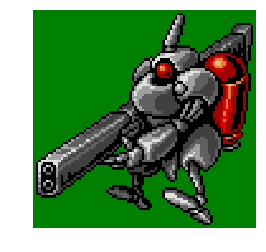

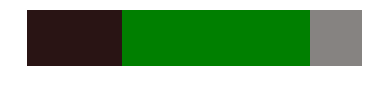

In [13]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bar
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()